## 実験概要
DC-SGDにおけるサンプル数について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

- ノイズの種類
    - 正規分布
        - 平均0
        - 分散
            - 2.2

    - 対数正規分布
        - 平均0
        - 分散
            - 1.75

- 次元数
    - 128

- n
    - 100
    - 1000
    - 10000
    - 100000

トライアルの回数は100,ただし損失の推移についてはそのうちの一回を使用

## 結果


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import DC_SGD
from ML2_lib import loss
from ML2_lib import plot_set

In [3]:
X_mean = 5
X_var = 2
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
n = 100
c = 1
noise = "normal"


  0%|          | 0/100 [00:00<?, ?it/s]

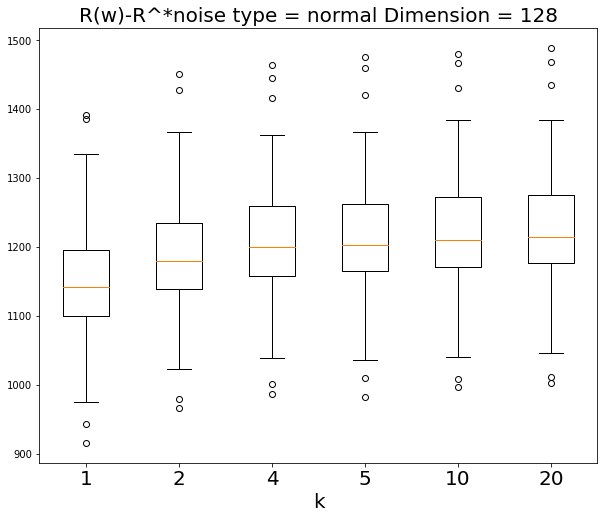

In [4]:
E_var = 1.75

w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [5]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1145.847744,1185.232149,1205.168760,1209.707174,1217.479186,1221.501263
std,90.304973,91.096106,92.943574,94.187169,94.642898,93.967843
min,915.264493,965.606518,986.839377,982.378062,996.065726,1001.841790
25%,1099.675368,1139.219465,1157.629208,1165.150797,1170.735578,1176.096067
50%,1142.251987,1179.924218,1200.028327,1202.986350,1210.488189,1214.674871
75%,1195.310529,1234.827280,1259.670111,1262.864198,1272.661202,1274.840445
max,1391.697913,1450.672024,1463.636908,1475.658668,1479.827798,1489.224118


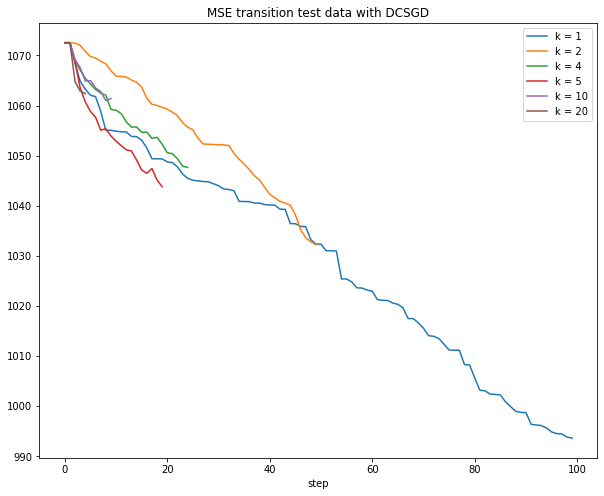

In [6]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

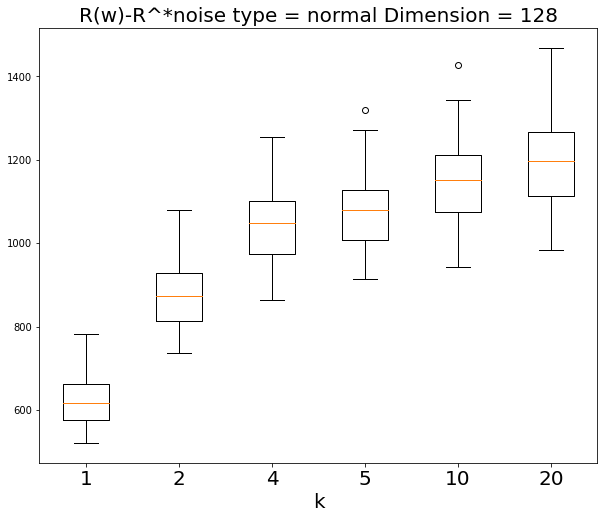

In [7]:

E_var = 1.75

n = 1000
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [8]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,621.837248,874.301347,1042.345764,1077.312244,1151.202889,1193.765071
std,56.457577,74.350909,85.442591,89.272015,95.771918,98.161538
min,520.380444,735.501375,863.937308,914.496594,942.613826,984.484396
25%,575.387203,813.422739,974.308890,1006.688797,1073.779335,1113.089954
50%,617.098625,873.834738,1048.622864,1079.803328,1151.485618,1196.405713
75%,661.918099,928.832136,1100.131564,1126.953234,1212.473961,1266.056132
max,781.984112,1079.059510,1254.762222,1320.562785,1428.172610,1469.110520


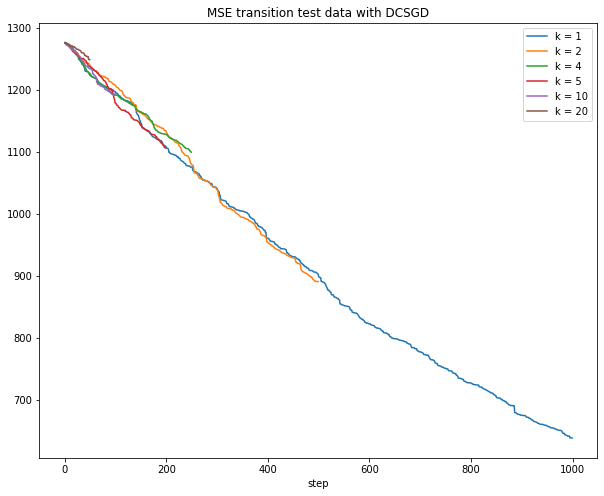

In [9]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

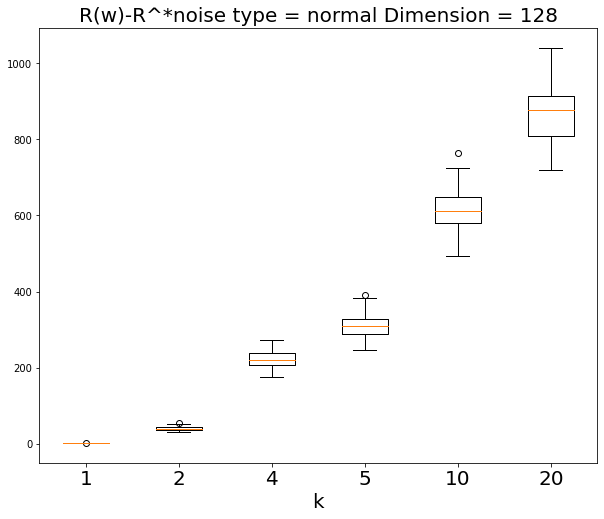

In [10]:

E_var = 1.75
n = 10000
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [11]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.888056,39.557654,221.642493,309.826649,614.750280,869.144505
std,0.233255,4.374271,20.505006,28.806718,55.170965,73.938328
min,1.344469,29.833609,175.804692,247.026798,493.379810,719.034787
25%,1.725672,36.606914,205.586667,287.304444,579.172726,809.221084
50%,1.876956,39.567638,219.872433,309.949283,611.597046,877.333879
75%,2.032609,42.424101,237.962336,328.619370,648.089036,914.924248
max,2.690094,53.907239,273.669540,391.083714,764.882709,1041.461364


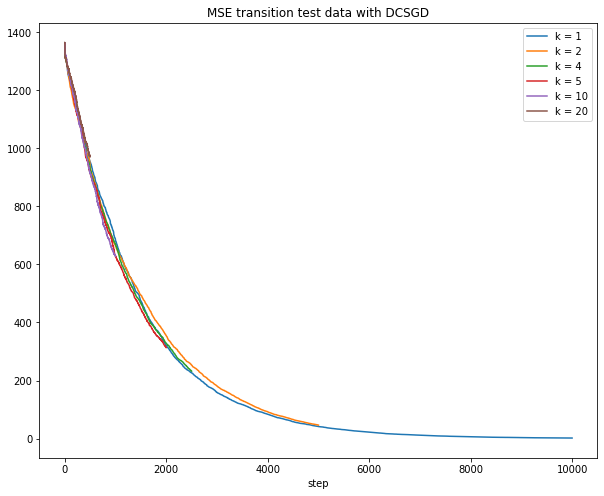

In [12]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

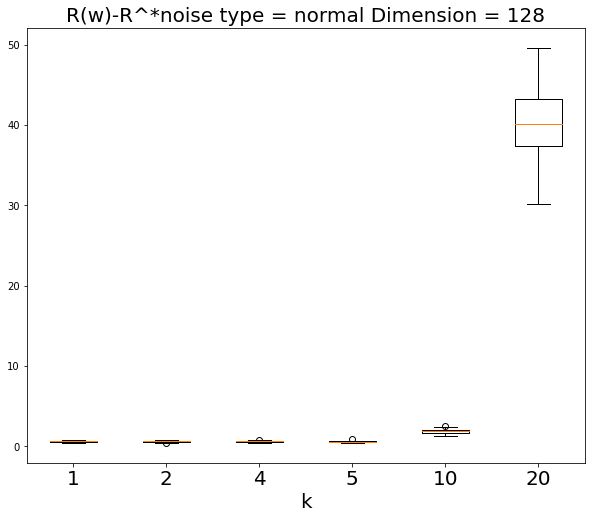

In [13]:

E_var = 1.75
n = 100000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [14]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.600008,0.597159,0.602084,0.583602,1.856588,40.265275
std,0.083116,0.076313,0.080856,0.072389,0.251319,4.253339
min,0.398703,0.411237,0.445644,0.417079,1.284126,30.176546
25%,0.534144,0.557991,0.544685,0.540659,1.699988,37.384522
50%,0.615911,0.593961,0.598055,0.588013,1.847825,40.170333
75%,0.662573,0.653972,0.655503,0.633148,2.033220,43.298459
max,0.802905,0.759480,0.831241,0.860568,2.558856,49.648396


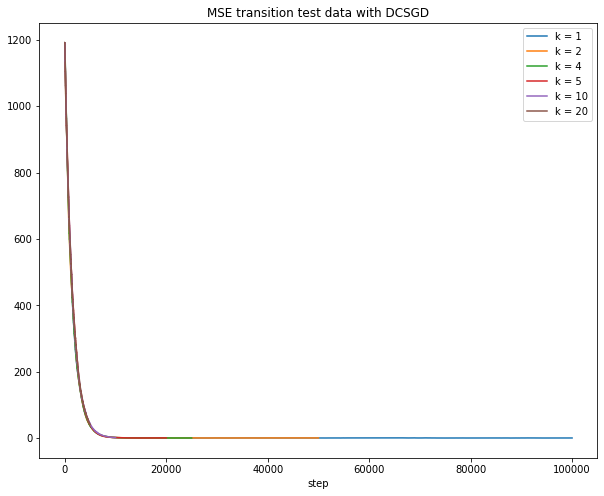

  0%|          | 0/100 [00:00<?, ?it/s]

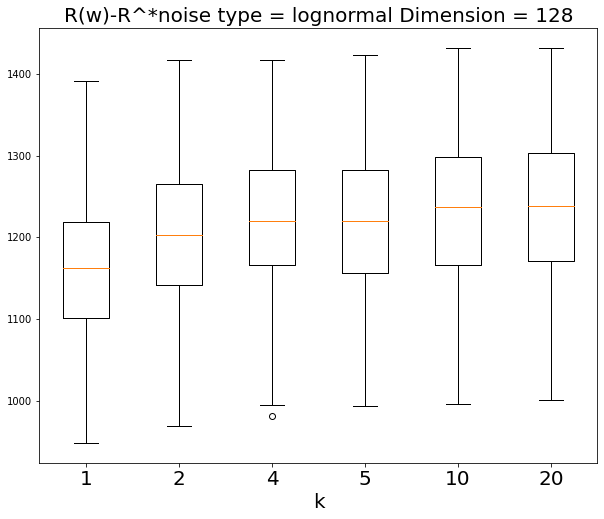

In [15]:
#lognormal noise

noise = "lognormal"
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

E_var = 1.75
n = 100
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [16]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1161.782411,1198.854977,1218.722175,1222.022829,1231.090531,1236.144524
std,89.360628,90.668796,91.164758,93.874149,94.197008,94.967806
min,948.068617,968.800479,980.667720,993.936179,995.772266,1001.180963
25%,1100.907833,1141.521646,1165.940750,1156.558777,1166.504956,1170.777221
50%,1161.959277,1203.295309,1219.913278,1219.934229,1237.060401,1238.374360
75%,1218.183833,1264.721632,1281.819771,1282.505023,1298.000259,1303.523612
max,1390.919264,1417.303522,1416.514842,1423.328099,1431.089012,1431.960898


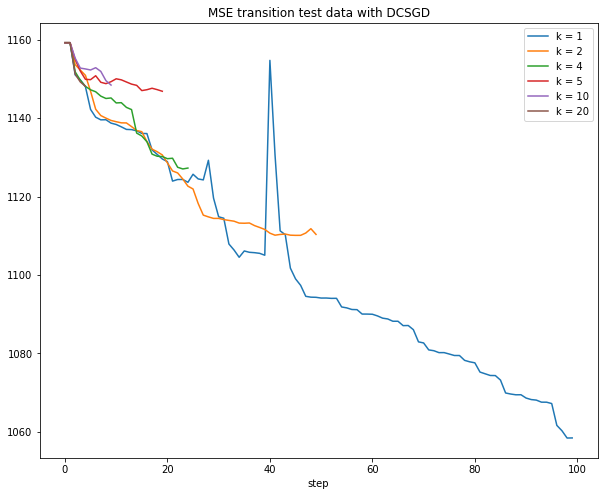

In [17]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

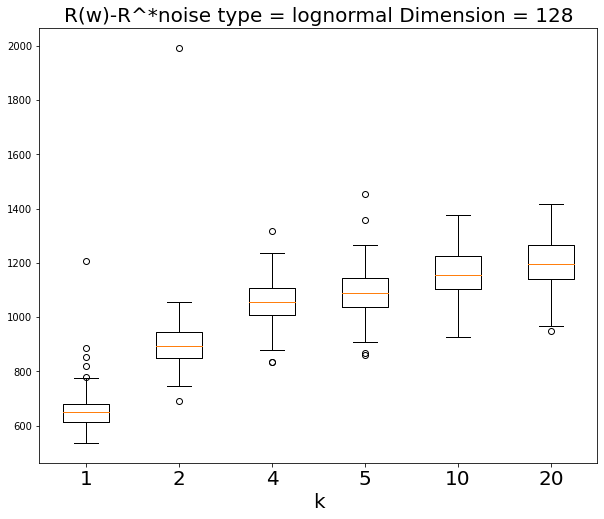

In [18]:

E_var = 1.75
n = 1000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [19]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,657.395649,905.117524,1055.324177,1090.986483,1160.857046,1199.406619
std,84.511937,131.721678,81.699129,95.061164,90.444641,88.312355
min,536.429568,690.101260,834.232823,861.126918,926.950743,948.592135
25%,614.838799,848.637014,1008.240990,1035.615684,1105.461563,1142.165456
50%,648.900527,893.214246,1056.919444,1088.037537,1156.882103,1197.296550
75%,679.459178,945.944905,1105.584487,1143.024189,1226.611909,1264.149062
max,1207.160074,1992.342926,1317.239819,1455.008316,1377.138057,1417.106752


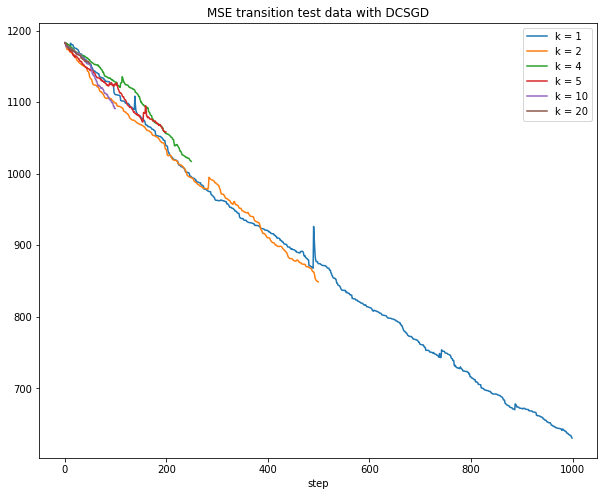

In [20]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

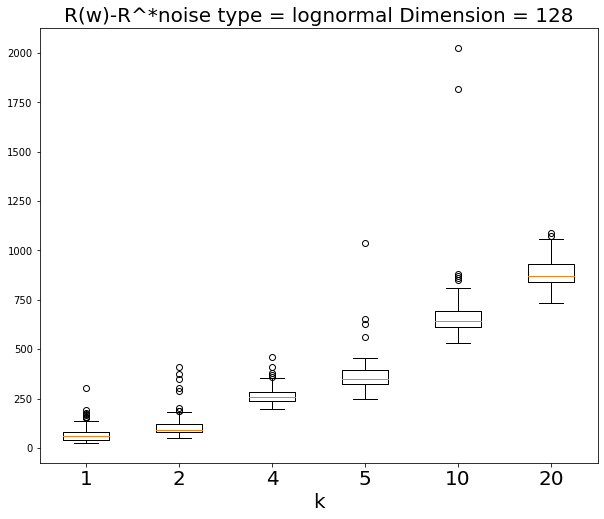

In [21]:

E_var = 1.75
n = 10000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [22]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,70.079609,112.891098,265.689906,369.585670,682.425912,890.952623
std,43.175576,63.077237,44.999583,92.409429,192.595015,73.787395
min,24.705467,49.740799,194.754744,246.041599,529.664783,733.935593
25%,41.533127,80.470228,235.184565,321.894281,611.416755,842.572433
50%,58.516253,92.843875,259.876515,346.661823,642.966915,871.766725
75%,82.371500,121.476611,283.440730,394.276765,695.612363,929.447596
max,305.557810,411.025141,459.864835,1037.597612,2027.020244,1090.937448


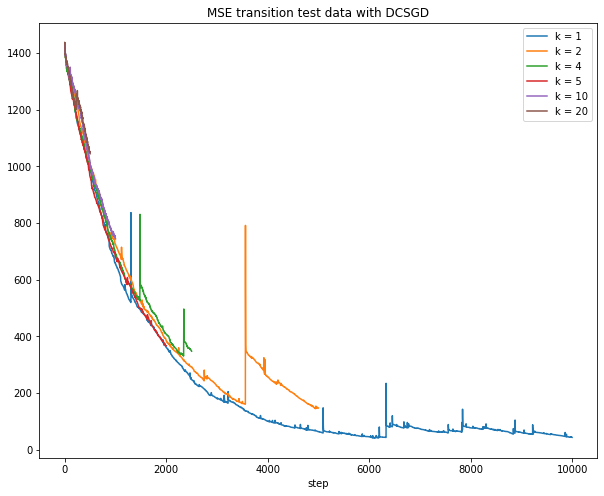

In [23]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

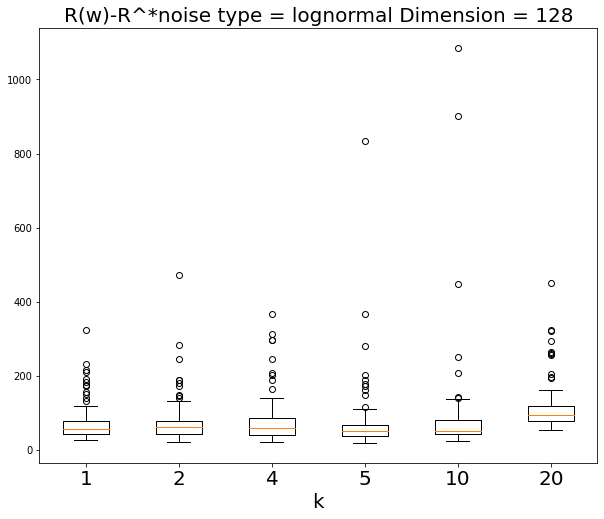

In [24]:

E_var = 1.75
n = 100000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [25]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,73.733899,74.550301,77.961627,73.054307,87.630456,115.422291
std,51.404627,60.860884,63.950320,92.406760,141.328597,65.587861
min,25.784038,20.122212,22.301701,18.201612,24.118642,53.793022
25%,41.592417,42.205201,41.131570,38.022092,42.093136,77.995115
50%,57.260934,60.693713,57.874388,51.026114,51.710971,94.825640
75%,77.379009,78.415381,85.410477,68.007272,80.794142,119.376064
max,322.095848,471.324445,365.404597,833.316655,1085.782848,449.518960


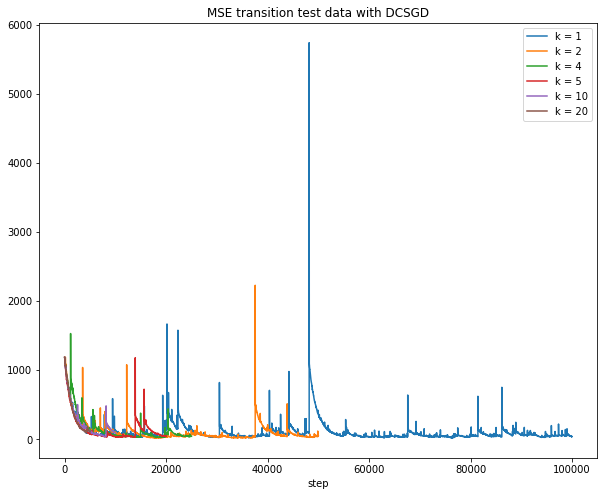

In [26]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)